In [1]:
import vaex
import numpy as np
from glob import glob
from time import time
from os.path import join, abspath
from os import pardir, mkdir
import sys
from matplotlib import pyplot as plt
from tqdm import tqdm
import pandas as pd

In [2]:
current = abspath('')
# import utils
root_dir = abspath(join(current, pardir))
if not root_dir in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/2_Cleaning',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [3]:
from utils import safe_mkdir

In [4]:
# root data dir
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [5]:
# create directory for the best parameters
name = "Best-Pars"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)
data_dir

Directory /home2/s20321005/Thesis-Project/Data/Best-Pars already exist. Good to go!


'/home2/s20321005/Thesis-Project/Data/Best-Pars'

In [6]:
# load combined data
combine_data_dir = join(root_data_dir, "Combine", "combine_gaia")
combine_data_dir

'/home2/s20321005/Thesis-Project/Data/Combine/combine_gaia'

In [7]:
# see the data
files = glob(join(combine_data_dir, "*.hdf5"))
files.sort()
data = vaex.open_many(files[:5])
data

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,152.84476,4.919384,303.11950730746855,-27.865822360149586,5675.6104,5664.237,5689.443,4.4943,4.4881,4.4991,-0.555,-0.5718,-0.5386,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,00004331-8914378,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,30.259687,0.167822,303.05891462343493,-27.634759739425405,4251.7476,4108.759,4291.554,2.0187,1.7589,2.0434,0.1172,0.1112,0.12,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,0.17,0.16,0.19,-0.05,-0.05,-0.04,-0.13,-0.22,-0.03,K,00012116-8928517,1,111,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,0.392894,-89.286575,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,8.2865095,6.5148206,303.10597686099044,-27.824720661451884,5750.4326,5745.2676,5755.3184,4.3541,4.3477,4.3606,-0.2969,-0.3044,-0.2905,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,00013429-8917116,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,-9.221251,6.7962427,303.09523730720935,-27.787137577515743,6268.863,6260.8765,6277.1826,4.2543,4.2417,4.2669,-0.3655,-0.3711,-0.3599,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,nan,nan,nan,nan,nan,nan,nan,nan,nan,F,00015786-8919312,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,0.140988,-88.624542,12.574,12.226,AAA,4612059856678435456,7.222961,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,13.668672,14.00575,13.163239,1205.9458,2095.7776,1.0062797,1.2021444,33.838387,3.4127908,303.27634091220216,-28.469529127008617,6146.648,6133.3306,6160.546,4.2041,4.197,4.2109,-0.5671,-0.5814,-0.5514,858.9404,850.0156,867.

In [8]:
data.column_names

['ra',
 'dec',
 'Jmag',
 'Kmag',
 'ph_qual',
 'source_id',
 'pm',
 'pmra',
 'e_pmra',
 'pmdec',
 'e_pmdec',
 'parallax',
 'e_parallax',
 'gmag',
 'bpmag',
 'rpmag',
 'fb_over_err',
 'fr_over_err',
 'ruwe',
 'excess_factor',
 'rv_gaia',
 'e_rv_gaia',
 'GLON',
 'GLAT',
 'teff_gspphot',
 'teff_gspphot_lower',
 'teff_gspphot_upper',
 'logg_gspphot',
 'logg_gspphot_lower',
 'logg_gspphot_upper',
 'mh_gspphot',
 'mh_gspphot_lower',
 'mh_gspphot_upper',
 'distance_gspphot',
 'distance_gspphot_lower',
 'distance_gspphot_upper',
 'ag_gspphot',
 'ag_gspphot_lower',
 'ag_gspphot_upper',
 'mh_gspspec',
 'mh_gspspec_lower',
 'mh_gspspec_upper',
 'alphafe_gspspec',
 'alphafe_gspspec_lower',
 'alphafe_gspspec_upper',
 'fem_gspspec',
 'fem_gspspec_lower',
 'fem_gspspec_upper',
 'spectraltype_esphs',
 'designation',
 'use_src',
 'rd_flg',
 'rv_rave',
 'e_rv_rave',
 'teff_rave',
 'logg_rave',
 'mh_rave',
 'alphafe_rave',
 'teff_galah',
 'e_teff_galah',
 'logg_galah',
 'e_logg_galah',
 'feh_galah',
 'e_f

# Reality Check

Not all catalogs are created equal. Some catalogs are more complete than others. Some catalogs are more accurate than others.

Let's examine the details of the catalogs we are using.

| pars        | Gaia | gspphot | gspspec | rave | galah | lamost | apogee |
| ----------- | ---- | ------- | ------- | ---- | ----- | ------ | ------ |
| rv          |  x   |         |         |   x  |   x   |    x   |   x    |
| `e_rv`      | `x`  |         |         |  `x` |  `x`  |   `x`  |  `x`   |
| teff        |      |    x    |         |   x  |   x   |    x   |   x    |
| `e_teff`    |      |  `xx`   |         |      |  `x`  |   `x`  |  `x`   |
| logg        |      |    x    |         |   x  |   x   |    x   |   x    |
| `e_logg`    |      |  `xx`   |         |      |  `x`  |   `x`  |  `x`   |
| feh         |      |         |         |      |   x   |    x   |   x    |
| `e_feh`     |      |         |         |      |  `x`  |   `x`  |  `x`   |
| mh          |      |    x    |   x     |   x  |       |        |   x    |
| `e_mh`      |      |  `xx`   |  `xx`   |      |       |        |  `x`   |
| fem         |      |         |   x     |      |       |        |        |
| `e_fem`     |      |         |  `xx`   |      |       |        |        |
| alphafe     |      |         |   x     |   x  |   x   |        |        |
| `e_alphafe` |      |         |  `xx`   |      |  `x`  |        |        |
| alpham      |      |         |         |      |       |    x   |   x    |
| `e_alpham`  |      |         |         |      |       |   `x`  |  `x`   |
| dist        |      |    x    |         |      |       |        |        |
| `e_dist`    |      |   `xx`  |         |      |       |        |        |
| ag          |      |    x    |         |      |       |        |        |
| `e_ag`      |      |   `xx`  |         |      |       |        |        |


`xx` means there are upper and lower limits.

The most basic questions are
1. How to select the best parameters for a given star?
2. What's the difference between $\text{M}$ and $\text{Fe}$? Are they actually the same thing?

let's investigate the first question.

**Naive Approach** 

Just calculate the weighted average. This method is simple but not robust.

**Better Approach**

let's say we have N catalogs for parameters a. Here's the procedure:

1. If N=1, then select the only catalog.
2. If N=2, check wether both catalogs have uncertainties. 
    * If yes, then select the catalog with the smaller uncertainty.
    * If no, then select the catalog with uncertainties.
3. If N>2, again, filter out the catalogs without uncertainties. Let there are M catalogs left.
    * If M=1, then select the only catalog.
    * If M=2, then select the catalog with the smaller uncertainty.
    * If M>2, then calculate their weighted average. Assume the weighted average is $a_{\text{avg}}$. Then filter again the catalogs that's contain $a_{\text{avg}}$ inside their $[a_i-2\sigma^{-}_{a,i},a_i+2\sigma^{+}_{a,i}]$  range. Let there are K catalogs left.
        * If K=0, then select the catalog with the smaller uncertainty from M.
        * If K=1, then select the only catalog.
        * If K>2, then select the catalog with the smaller uncertainty.

The third criteria is used to filter out the catalogs that are not reliable. Other catalogs were used to corroborate the best estimate.

The weight is calculated as $w_i = \frac{1}{\sigma_i^2}$.

And if there are upper and lower $\sigma$, calculate the effective $\sigma$ as $\sigma_i = \sqrt{\sigma_i^+ \sigma_i^-}$.

Experiment

In [12]:
import pandas as pd

# mock catalogs
catalogs = ["a", "b", "c", "d", "e"]
data = {}
rows = 100
for catalog in catalogs:
    # randomly selected m rows as None, at most 50% of the rows
    m = rows - np.random.randint(0, np.floor(rows*0.5).astype(int))

    # Create an array with all True values
    setNone = np.full(rows, True)

    # Set m random values to False
    setNone[np.random.choice(rows, m, replace=False)] = False

    # Create an array of length N with random values
    p = np.random.randn(rows)+5
    ep = np.random.randn(rows)**2
    ep_upper = np.random.randn(rows)**2

    # Set values in my_array to None where arr is True
    p[setNone] = None
    ep[setNone] = None
    if not catalog in ["d", "e"]:
        d = {f"p_{catalog}": p, f"e_p_{catalog}": ep}
    # catalogs d has no uncertainty
    elif catalog == "d":
        d = {f"p_{catalog}": p}
    # catalogs e has upper and lower values
    else:
        d = {f"p_{catalog}": p, f"p_{catalog}_lower": p-ep, f"p_{catalog}_upper": p+ep_upper}
    data.update(d)

df_mock = pd.DataFrame(data)
df_mock

,p_a,e_p_a,p_b,e_p_b,p_c,e_p_c,p_d,p_e,p_e_lower,p_e_upper
0,5.450104,0.844049,5.402717,0.163630,3.844634,0.770621,NaN,4.848377,4.096499,6.785947
1,7.027161,0.886418,3.654979,0.148147,4.652738,0.491990,5.188937,NaN,NaN,NaN
2,2.794663,0.150488,6.393893,0.161762,4.429307,1.314450,4.166401,4.961019,4.235342,6.343793
3,5.666609,0.009890,3.198308,0.169089,6.354549,4.156423,5.332719,5.831228,3.086060,5.837041
4,5.217342,0.560736,4.362080,0.046180,5.779566,1.110614,5.025547,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,5.486221,1.559134,3.594403,1.574433,NaN,NaN,5.725335,3.300977,2.126168,3.520146
96,4.861330,0.211989,4.098568,0.923481,4.586634,1.152895,4.735633,3.972659,3.549514,4.039624
97,5.331023,0.467545,5.748355,1.288740,2.818698,1.188501,5.503006,5.669289,5.413210,5.765917
98,4.726557,0.689449,4.314369,0.674281,4.824148,0.043284,NaN,3.678757,2.727919,3.808181


In [13]:
# change the first row to None except for p_b and e_p_b
for col in df_mock.columns:
    if not col in ["p_b", "e_p_b"]:
        df_mock.loc[0, col] = None
    if not col in ["p_b", "e_p_b", "p_d"]:
        df_mock.loc[5, col] = None
df_mock[:10]

,p_a,e_p_a,p_b,e_p_b,p_c,e_p_c,p_d,p_e,p_e_lower,p_e_upper
0,NaN,NaN,5.402717,0.163630,NaN,NaN,NaN,NaN,NaN,NaN
1,7.027161,0.886418,3.654979,0.148147,4.652738,0.491990,5.188937,NaN,NaN,NaN
2,2.794663,0.150488,6.393893,0.161762,4.429307,1.314450,4.166401,4.961019,4.235342,6.343793
3,5.666609,0.009890,3.198308,0.169089,6.354549,4.156423,5.332719,5.831228,3.086060,5.837041
4,5.217342,0.560736,4.362080,0.046180,5.779566,1.110614,5.025547,NaN,NaN,NaN
5,NaN,NaN,3.768406,4.048751,NaN,NaN,5.983056,NaN,NaN,NaN
6,5.052657,0.583166,4.984701,0.123976,NaN,NaN,5.692004,5.909552,5.905407,5.910610
7,4.249596,0.355975,5.107215,1.674805,4.762170,3.831903,4.496987,3.964501,2.978289,4.711120
8,6.161220,0.906699,6.288141,0.345649,5.322006,0.610521,5.748156,3.542846,2.726444,5.261961
9,NaN,NaN,5.105997,0.698257,NaN,NaN,3.165645,5.912476,4.866926,6.092957


How do we handle it?

We are going to iterate over each rows. Here are the steps:

1. Create a dict cats, where it contains this signature: 
```
cats = {
    name: str, 
    value: float, 
    e_value_upper: float, 
    e_value_lower: float, 
    e_effective: float,
    sym: int
}[]
```
sym: 1 True, 0 False, -1 None

1. desc:
    * name: the name of the catalog
    * value: the (median/mean/mode/best) value of the parameter
    * e_value_upper: the upper uncertainty of the parameter
    * e_value_lower: the lower uncertainty of the parameter
    * sym: whether the uncertainties are symmetric 
2. Check the length of non-null values of cats. If it's 1, then select the only catalog.
3. If it's 2, check wether both catalogs have uncertainties. 
    * If yes, then select the catalog with the smaller uncertainty.
    * If no, then select the catalog with uncertainties.
4. If it's >2, again, filter out the catalogs without uncertainties. Let there are M catalogs left.
    * If M=1, then select the only catalog.
    * If M=2, then select the catalog with the smaller uncertainty.
    * If M>2, then calculate their weighted average. Assume the weighted average is $a_{\text{avg}}$. Then filter again the catalogs that's contain $a_{\text{avg}}$ inside their $[a_i-2\sigma^{-}_{a,i},a_i+2\sigma^{+}_{a,i}]$  range. Let there are K catalogs left.
        * If K=1, then select the only catalog.
        * If K=2, then select the catalog with the smaller uncertainty.
        * If K>2, calculate the weighted average again. Assume the weighted average is $a_{\text{avg}}$. Then filter again the catalogs that's contain $a_{\text{avg}}$ inside their $[a_i-2\sigma^{-}_{a,i},a_i+2\sigma^{+}_{a,i}]$  range. Let there are L catalogs left.
            * If L=0, then select the catalog with the smaller uncertainty from M.
            * If L=1, then select the only catalog.
            * If L>1, then select the catalog with the smaller uncertainty.


In [14]:
sym_ass = {
    True: 1,
    False: 0,
    None: -1
}

def assign(cat, keys):
    return [cat[key] for key in keys]

def best_pars(row, catalogs, par="p"):
    best_val = np.nan
    best_cat = np.nan
    best_el = np.nan
    best_eu = np.nan
    best_sym = np.nan
    keys = ["name", "value", "e_value_lower", "e_value_upper", "sym"]
    cats = []
    for catalog in catalogs:
        c = {
            "name": catalog['name'], 
            "value": row[catalog['value']] if catalog['value'] != None else np.nan, 
            "e_value_upper": row[catalog['e_value_upper']] if catalog['e_value_upper'] != None else np.nan, 
            "e_value_lower": row[catalog['e_value_lower']] if catalog['e_value_lower'] != None else np.nan,
            "e_effective": row[catalog['e_value_upper']] if catalog['e_value_upper'] != None else np.nan, 
            "sym": sym_ass[catalog['sym']]
        }
        if catalog['sym'] == False:
            c['e_value_upper'] = c['e_value_upper'] - c['value']
            c['e_value_lower'] = c['value'] - c['e_value_lower']
            c['e_effective'] = np.sqrt([c['e_value_upper']*c['e_value_lower']][0])
        if c['e_effective'] == 0:
            c['e_effective'] = 100_000
        cats.append(c)
    cats_filtered = [c for c in cats if not np.isnan(c['value'])]
    
    if len(cats_filtered) == 1:
        cat = cats_filtered[0]
        best_cat, best_val, best_el, best_eu, best_sym= assign(cat, keys)
    elif len(cats_filtered) > 1:
        cats_filtered_2 = [c for c in cats_filtered if not np.isnan(c['e_value_upper'])]
        if len(cats_filtered_2) == 1:
            cat = cats_filtered_2[0]
            best_cat, best_val, best_el, best_eu, best_sym = assign(cat, keys)
        elif len(cats_filtered_2) == 2:
            minarg = np.argmin([c['e_effective'] for c in cats_filtered_2])
            cat = cats_filtered_2[minarg]
            best_cat, best_val, best_el, best_eu, best_sym = assign(cat, keys) 
        elif len(cats_filtered_2) > 2:
            weights = np.array([1/c['e_effective']**2 for c in cats_filtered_2])
            avg = np.average([c['value'] for c in cats_filtered_2], weights=weights)
            m = 2
            mask = (avg > np.array([c['value']-m*c['e_value_lower'] for c in cats_filtered_2])) * (avg < np.array([c['value']+m*c['e_value_upper'] for c in cats_filtered_2]))
            cats_filtered_3 = np.array(cats_filtered_2)[mask]
            if len(cats_filtered_3) == 0:
                minarg = np.argmin([c['e_effective'] for c in cats_filtered_2])
                cat = cats_filtered_2[minarg]
                best_cat, best_val, best_el, best_eu, best_sym = assign(cat, keys) 
            elif len(cats_filtered_3) == 1:
                cat = cats_filtered_3[0]
                best_cat, best_val, best_el, best_eu, best_sym = assign(cat, keys)
            else:
                minarg = np.argmin([c['e_effective'] for c in cats_filtered_3])
                cat = cats_filtered_3[minarg]
                best_cat, best_val, best_el, best_eu, best_sym = assign(cat, keys) 
    row[f'{par}'] = best_val
    row[f'{par}_cat'] = best_cat
    row[f'{par}_el'] = best_el
    row[f'{par}_eu'] = best_eu
    row[f'{par}_sym'] = best_sym
    return row

catalogs = [
    {"name": "a", "value": "p_a", "e_value_upper": "e_p_a", "e_value_lower": "e_p_a", "sym": True},
    {"name": "b", "value": "p_b", "e_value_upper": "e_p_b", "e_value_lower": "e_p_b", "sym": True},
    {"name": "c", "value": "p_c", "e_value_upper": "e_p_c", "e_value_lower": "e_p_c", "sym": True},
    {"name": "d", "value": "p_d", "e_value_upper": None, "e_value_lower": None, "sym": None},
    {"name": "e", "value": "p_e", "e_value_upper": "p_e_upper", "e_value_lower": "p_e_lower", "sym": False},
]

df_mock.apply(best_pars, axis=1, args=(catalogs, "p"))

,p_a,e_p_a,p_b,e_p_b,p_c,e_p_c,p_d,p_e,p_e_lower,p_e_upper,p,p_cat,p_el,p_eu,p_sym
0,NaN,NaN,5.402717,0.163630,NaN,NaN,NaN,NaN,NaN,NaN,5.402717,b,0.163630,0.163630,1
1,7.027161,0.886418,3.654979,0.148147,4.652738,0.491990,5.188937,NaN,NaN,NaN,3.654979,b,0.148147,0.148147,1
2,2.794663,0.150488,6.393893,0.161762,4.429307,1.314450,4.166401,4.961019,4.235342,6.343793,4.961019,e,0.725677,1.382774,0
3,5.666609,0.009890,3.198308,0.169089,6.354549,4.156423,5.332719,5.831228,3.086060,5.837041,5.666609,a,0.009890,0.009890,1
4,5.217342,0.560736,4.362080,0.046180,5.779566,1.110614,5.025547,NaN,NaN,NaN,4.362080,b,0.046180,0.046180,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.486221,1.559134,3.594403,1.574433,NaN,NaN,5.725335,3.300977,2.126168,3.520146,3.300977,e,1.174809,0.219169,0
96,4.861330,0.211989,4.098568,0.923481,4.586634,1.152895,4.735633,3.972659,3.549514,4.039624,4.098568,b,0.923481,0.923481,1
97,5.331023,0.467545,5.748355,1.288740,2.818698,1.188501,5.503006,5.669289,5.413210,5.765917,5.669289,e,0.256079,0.096628,0
98,4.726557,0.689449,4.314369,0.674281,4.824148,0.043284,NaN,3.678757,2.727919,3.808181,4.824148,c,0.043284,0.043284,1


## Second question

What's the difference between $\text{M}$ and $\text{Fe}$? Are they actually the same thing?

Let's examine each catalogs.

### Gaia

There are two models for the metallicity for Gaia, GSP-PHOT and GSP-SPEC. Pretty much self explanatory. 

### RAVE

rave has `mh` column. This is THE metallicity, means all metal elements.

### GALAH

galah has `feh` column. 



look at each parameters first.


## rv
* Gaia, rave, galah, lamost, apogee
only rave doesn't have uncertainties.


In [12]:
catalogs_rv = [
    {"name": "gaia", "value": "rv_gaia", "e_value_upper": "e_rv_gaia", "e_value_lower": "e_rv_gaia", "sym": True},
    {"name": "rave", "value": "rv_rave", "e_value_upper": "e_rv_rave", "e_value_lower": "e_rv_rave", "sym": True},
    {"name": "galah", "value": "rv_galah", "e_value_upper": "e_rv_galah", "e_value_lower": "e_rv_galah", "sym": True},
    {"name": "lamost", "value": "rv_lamost", "e_value_upper": "e_rv_lamost", "e_value_lower": "e_rv_lamost", "sym": True},
    {"name": "apogee", "value": "rv_apogee", "e_value_upper": "e_rv_apogee", "e_value_lower": "e_rv_apogee", "sym": True},    
]

catalogs_teff = [
    {"name": "gspphot", "value": "teff_gspphot", "e_value_upper": "teff_gspphot_upper", "e_value_lower": "teff_gspphot_lower", "sym": False},
    {"name": "rave", "value": "teff_rave", "e_value_upper": None, "e_value_lower": None, "sym": None},
    {"name": "galah", "value": "teff_galah", "e_value_upper": "e_teff_galah", "e_value_lower": "e_teff_galah", "sym": True},
    {"name": "lamost", "value": "teff_lamost", "e_value_upper": "e_teff_lamost", "e_value_lower": "e_teff_lamost", "sym": True},
    {"name": "apogee", "value": "teff_apogee", "e_value_upper": "e_teff_apogee", "e_value_lower": "e_teff_apogee", "sym": True},
]
catalogs_logg = [
    {"name": "gspphot", "value": "logg_gspphot", "e_value_upper": "logg_gspphot_upper", "e_value_lower": "logg_gspphot_lower", "sym": False},
    {"name": "rave", "value": "logg_rave", "e_value_upper": None, "e_value_lower": None, "sym": None},
    {"name": "galah", "value": "logg_galah", "e_value_upper": "e_logg_galah", "e_value_lower": "e_logg_galah", "sym": True},
    {"name": "lamost", "value": "logg_lamost", "e_value_upper": "e_logg_lamost", "e_value_lower": "e_logg_lamost", "sym": True},
    {"name": "apogee", "value": "logg_apogee", "e_value_upper": "e_logg_apogee", "e_value_lower": "e_logg_apogee", "sym": True},
]
catalogs_feh = [
    {"name": "galah", "value": "feh_galah", "e_value_upper": "e_feh_galah", "e_value_lower": "e_feh_galah", "sym": True},
    {"name": "lamost", "value": "feh_lamost", "e_value_upper": "e_feh_lamost", "e_value_lower": "e_feh_lamost", "sym": True},
    {"name": "apogee", "value": "feh_apogee", "e_value_upper": "e_feh_apogee", "e_value_lower": "e_feh_apogee", "sym": True},
]

catalogs_mh = [
    {"name": "gspphot", "value": "mh_gspphot", "e_value_upper": "mh_gspphot_upper", "e_value_lower": "mh_gspphot_lower", "sym": False},
    {"name": "gspspec", "value": "mh_gspspec", "e_value_upper": "mh_gspspec_upper", "e_value_lower": "mh_gspspec_lower", "sym": False},
    {"name": "rave", "value": "mh_rave", "e_value_upper": None, "e_value_lower": None, "sym": None},
    {"name": "apogee", "value": "mh_apogee", "e_value_upper": "e_mh_apogee", "e_value_lower": "e_mh_apogee", "sym": True},
]

catalogs_alphafe = [
    {"name": "gspspec", "value": "alphafe_gspspec", "e_value_upper": "alphafe_gspspec_upper", "e_value_lower": "alphafe_gspspec_lower", "sym": False},
    {"name": "rave", "value": "alphafe_rave", "e_value_upper": None, "e_value_lower": None, "sym": None},
    {"name": "galah", "value": "alphafe_galah", "e_value_upper": "e_alphafe_galah", "e_value_lower": "e_alphafe_galah", "sym": True},
]

catalogs_alpham = [
    {"name": "lamost", "value": "alpham_lamost", "e_value_upper": "e_alpham_lamost", "e_value_lower": "e_alpham_lamost", "sym": True},
    {"name": "apogee", "value": "alpham_apogee", "e_value_upper": "e_alpham_apogee", "e_value_lower": "e_alpham_apogee", "sym": True},
]


catalogs = {
    "rv": catalogs_rv,
    "teff": catalogs_teff,
    "logg": catalogs_logg,
    "feh": catalogs_feh,
    "mh": catalogs_mh,
    "alphafe": catalogs_alphafe,
    "alpham": catalogs_alpham,
}

In [ ]:
for file in files:
    name = file.split("/")[-1]
    print(name)
    df_vaex = vaex.open(file)
    df_vaex = df_vaex
    t0 = time()
    df = df_vaex.to_pandas_df()
    # df = df[:4000]
    # create empty dataframe
    df_com = pd.DataFrame()
    M = 100
    # iterate dataframe into chunks
    tot = len(df)//M
    cols = np.array([])
    for catalog in catalogs.values():
        col = np.array([[c['value'], c["e_value_upper"], c["e_value_lower"]] for c in catalog]).flatten()
        col = np.unique(col[col != None])
        cols = np.append(cols, col)    

    for i, df_chunk in tqdm(df.groupby(df.index // M)):
        t1 = time()
        # print(i, len(df_chunk))
        # iterate chunks into catalogs
        for par, catalog in catalogs.items():
            df_chunk = df_chunk.apply(best_pars, axis=1, args=(catalog, par))
        if len(df_com) == 0:
            df_com = df_chunk
        else:
            df_com = pd.concat([df_com, df_chunk])            
        if i == 3:
            break  
        # progressbar(i/tot*100, info=f"{np.round(t1-t0,2)} s", flush=True)
    df_com.drop(columns=cols, inplace=True) 
    df = vaex.from_pandas(df_com)
    # df.export(join(data_dir, name), progress=True)
    break
df 

Write the whole procedure in a script.

# Inspect

In [8]:
comb_files = glob(join(data_dir, "*.hdf5"))
comb_files.sort()
comb_files[:5], len(comb_files)

(['/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-004-005.hdf5'],
 360)

In [9]:
df = vaex.open(comb_files[0])
df

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym
0,0.180498,-89.243835,13.123000144958496,12.678999900817871,AAA,4611967772579686144,18.71722984313965,17.611683049974353,0.017649758607149124,-6.337454890038764,0.018100611865520477,1.553482146463873,0.01645069755613804,14.506683349609375,14.941158294677734,13.901935577392578,927.3828125,1271.326416015625,0.9241908192634583,1.2207494974136353,303.11950730746855,-27.865822360149586,586.5784301757812,580.6773071289062,592.7108764648438,0.44209998846054077,0.4359000027179718,0.4494999945163727,nan,nan,nan,G,00004331-8914378,1,222,--,152.84475708007812,gaia,4.919384002685547,4.919384002685547,1.0,5675.6103515625,gspphot,11.37353515625,13.83251953125,0.0,4.49429988861084,gspphot,0.006199836730957031,0.004800319671630859,0.0,nan,--,nan,nan,nan,-0.5550000071525574,gspphot,0.016799986362457275,0.01639997959136963,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan
1,0.338177,-89.481033,8.97700023651123,8.038000106811523,AAA,4611761957746621312,9.622093200683594,7.609580877064016,0.014360921457409859,-5.888883602727228,0.014550801366567612,0.8273958945757836,0.012673814781010151,11.280521392822266,12.197066307067871,10.340993881225586,1234.30517578125,3648.09716796875,1.0564011335372925,1.3118351697921753,303.05891462343493,-27.634759739425405,1171.7508544921875,1142.204345703125,1543.05419921875,0.8133999705314636,0.6207000017166138,0.8633999824523926,-0.12999999523162842,-0.2199999988079071,-0.029999999329447746,K,00012116-8928517,1,111,--,30.259687423706055,gaia,0.167822003364563,0.167822003364563,1.0,4251.74755859375,gspphot,142.98876953125,39.806640625,0.0,2.018699884414673,gspphot,0.2597998380661011,0.024700164794921875,0.0,nan,--,nan,nan,nan,0.11720000207424164,gspphot,0.006000004708766937,0.002799995243549347,0.0,-0.05000000074505806,gspspec,0.0,0.010000001639127731,0.0,nan,--,nan,nan,nan
2,0.392894,-89.286575,12.769000053405762,12.329999923706055,AAA,4611779756091083008,6.918576717376709,4.89813965086399,0.01557445153594017,-4.88619823091078,0.016693463549017906,1.4919122615226004,0.015075388364493847,14.183528900146484,14.626376152038574,13.570565223693848,865.9398193359375,1384.228271484375,1.063724160194397,1.2225970029830933,303.10597686099044,-27.824720661451884,625.9152221679688,620.0595703125,631.713623046875,0.5141000151634216,0.5109000205993652,0.5171999931335449,nan,nan,nan,G,00013429-8917116,1,222,--,8.28650951385498,gaia,6.514820575714111,6.514820575714111,1.0,5750.4326171875,gspphot,5.1650390625,4.8857421875,0.0,4.354100227355957,gspphot,0.006400108337402344,0.006499767303466797,0.0,nan,--,nan,nan,nan,-0.2969000041484833,gspphot,0.007499992847442627,0.006400018930435181,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan
3,0.491097,-89.325348,13.28499984741211,12.92199993133545,AAA,4611778656579457664,3.3354551792144775,2.758184654146036,0.015947440639138222,1.8755476312609647,0.01630321703851223,0.9132976622425212,0.014618651941418648,14.359504699707031,14.703383445739746,13.843310356140137,1021.37451171875,1692.3876953125,0.975788950920105,1.2055027484893799,303.09523730720935,-27.787137577515743,1043.23193359375,1028.8033447265625,1058.512939453125,0.3813000023365021,0.37709999084472656,0.3856000006198883,nan,nan,nan,F,00015786-8919312,1,222,--,-9.221250534057617,gaia,6.796242713928223,6.796242713928223,1.0,6268.86279296875,gspphot,7.986328125,8.31982421875,0.0,4.254300117492676,gspphot,0.0125999

In [10]:
df_com = vaex.open_many(comb_files)
df_com

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym
0,0.180498,-89.243835,13.123000144958496,12.678999900817871,AAA,4611967772579686144,18.71722984313965,17.611683049974353,0.017649758607149124,-6.337454890038764,0.018100611865520477,1.553482146463873,0.01645069755613804,14.506683349609375,14.941158294677734,13.901935577392578,927.3828125,1271.326416015625,0.9241908192634583,1.2207494974136353,303.11950730746855,-27.865822360149586,586.5784301757812,580.6773071289062,592.7108764648438,0.44209998846054077,0.4359000027179718,0.4494999945163727,nan,nan,nan,G,00004331-8914378,1,222,--,152.84475708007812,gaia,4.919384002685547,4.919384002685547,1.0,5675.6103515625,gspphot,11.37353515625,13.83251953125,0.0,4.49429988861084,gspphot,0.006199836730957031,0.004800319671630859,0.0,nan,--,nan,nan,nan,-0.5550000071525574,gspphot,0.016799986362457275,0.01639997959136963,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan
1,0.338177,-89.481033,8.97700023651123,8.038000106811523,AAA,4611761957746621312,9.622093200683594,7.609580877064016,0.014360921457409859,-5.888883602727228,0.014550801366567612,0.8273958945757836,0.012673814781010151,11.280521392822266,12.197066307067871,10.340993881225586,1234.30517578125,3648.09716796875,1.0564011335372925,1.3118351697921753,303.05891462343493,-27.634759739425405,1171.7508544921875,1142.204345703125,1543.05419921875,0.8133999705314636,0.6207000017166138,0.8633999824523926,-0.12999999523162842,-0.2199999988079071,-0.029999999329447746,K,00012116-8928517,1,111,--,30.259687423706055,gaia,0.167822003364563,0.167822003364563,1.0,4251.74755859375,gspphot,142.98876953125,39.806640625,0.0,2.018699884414673,gspphot,0.2597998380661011,0.024700164794921875,0.0,nan,--,nan,nan,nan,0.11720000207424164,gspphot,0.006000004708766937,0.002799995243549347,0.0,-0.05000000074505806,gspspec,0.0,0.010000001639127731,0.0,nan,--,nan,nan,nan
2,0.392894,-89.286575,12.769000053405762,12.329999923706055,AAA,4611779756091083008,6.918576717376709,4.89813965086399,0.01557445153594017,-4.88619823091078,0.016693463549017906,1.4919122615226004,0.015075388364493847,14.183528900146484,14.626376152038574,13.570565223693848,865.9398193359375,1384.228271484375,1.063724160194397,1.2225970029830933,303.10597686099044,-27.824720661451884,625.9152221679688,620.0595703125,631.713623046875,0.5141000151634216,0.5109000205993652,0.5171999931335449,nan,nan,nan,G,00013429-8917116,1,222,--,8.28650951385498,gaia,6.514820575714111,6.514820575714111,1.0,5750.4326171875,gspphot,5.1650390625,4.8857421875,0.0,4.354100227355957,gspphot,0.006400108337402344,0.006499767303466797,0.0,nan,--,nan,nan,nan,-0.2969000041484833,gspphot,0.007499992847442627,0.006400018930435181,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan
3,0.491097,-89.325348,13.28499984741211,12.92199993133545,AAA,4611778656579457664,3.3354551792144775,2.758184654146036,0.015947440639138222,1.8755476312609647,0.01630321703851223,0.9132976622425212,0.014618651941418648,14.359504699707031,14.703383445739746,13.843310356140137,1021.37451171875,1692.3876953125,0.975788950920105,1.2055027484893799,303.09523730720935,-27.787137577515743,1043.23193359375,1028.8033447265625,1058.512939453125,0.3813000023365021,0.37709999084472656,0.3856000006198883,nan,nan,nan,F,00015786-8919312,1,222,--,-9.221250534057617,gaia,6.796242713928223,6.796242713928223,1.0,6268.86279296875,gspphot,7.986328125,8.31982421875,0.0,4.254300117492676,gspphot,0.0125999

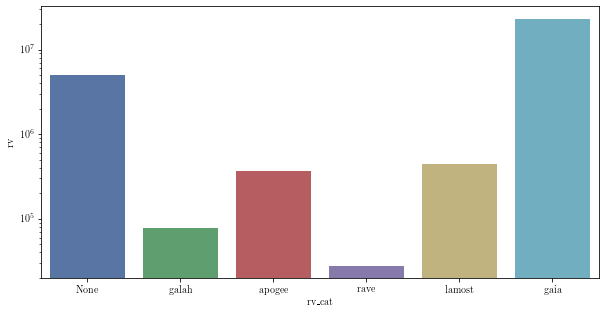

   rv_cat        rv   rv_mean     rv_std       rv_min       rv_max
0    None   5034355       NaN        NaN          inf         -inf
1   galah     78055  7.869475  44.109626  -404.141517   935.645383
2  apogee    370523 -3.344207  51.551622  -473.549377   499.959625
3    rave     27826  6.217612  63.635916 -2235.149902  1701.099976
4  lamost    442140 -6.118705  40.710498  -487.670013   465.299988
5    gaia  23191519 -3.115640  46.200837  -885.203186   863.330383


In [14]:
import seaborn as sns

par = "rv"
for par in catalogs.keys():
    df_group = df_com.groupby(f'{par}_cat').agg({par: ['count', 'mean', 'std', 'min', 'max']})
    df_group = df_group.to_pandas_df()
    df_group.at[0, f'{par}_cat'] = "None"
    plt.figure(figsize=(10, 5))
    sns.barplot(x=f'{par}_cat', y=par, data=df_group)
    plt.ylabel(par)
    plt.xlabel(f'{par}_cat')
    plt.yscale("log")
    plt.show()
    print(df_group)
    break

In [16]:
df_group.drop(labels=0, axis=0, inplace=True)

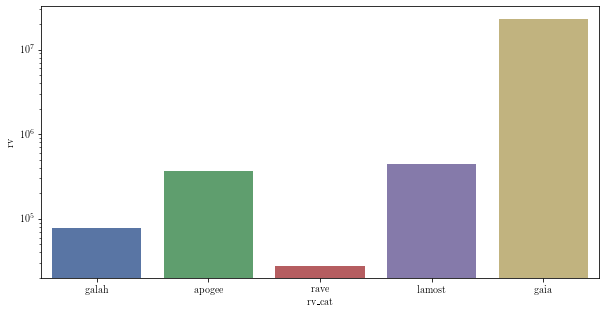

,rv_cat,rv,rv_mean,rv_std,rv_min,rv_max
1,galah,78055,7.869475,44.109626,-404.141517,935.645383
2,apogee,370523,-3.344207,51.551622,-473.549377,499.959625
3,rave,27826,6.217612,63.635916,-2235.149902,1701.099976
4,lamost,442140,-6.118705,40.710498,-487.670013,465.299988
5,gaia,23191519,-3.115640,46.200837,-885.203186,863.330383


In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x=f'rv_cat', y="rv", data=df_group)
plt.ylabel("rv")
# plt.xlabel(f'{par}_cat')
plt.yscale("log")
plt.savefig("contribution.pdf", dpi=70)
plt.show()
df_group